# Assignment 5: (Un)supervised Machine Learning

__Task:__ Train an LDA model on your data to extract structured information that can provide insight into your data. For example, maybe you are interested in seeing how different authors cluster together or how concepts change over time in this dataset.

In [1]:
# standard library
import sys,os
sys.path.append(os.path.join(".."))
from pprint import pprint

# data and nlp
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner"])
nlp.max_length = 67000000

# visualisation
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 20,10

# LDA tools
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from utils import lda_utils

# warnings
import logging, warnings
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

/home/cds-au617836/cds-language-forked/lang101/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package stopwords to /home/cds-
[nltk_data]     au617836/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Load text__

In [2]:
filename = os.path.join("..", "assignments", "data", "trumptweets.csv")

In [3]:
tweets_df = pd.read_csv(filename,
                        lineterminator = "\n")
tweets_df = tweets_df.loc[:, ("id", "content", "date")]

In [4]:
tweets_df.head()

,id,content,date
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28


__Create chunks of 10 sentences at a time__

In [5]:
# Create empty list for chunks of tweets
chunks = []
    
# Loop through the tweets and create chunks of 10 tweets
for i in range(0, len(tweets_df["content"]), 10):
    chunks.append(' '.join(tweets_df["content"][i:i+10]))

In [6]:
chunks[:10]

['Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight! Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion! Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny! New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e "My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl "Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm Enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthin

In [9]:
len(chunks)

4113

__Process using ```gensim```__

In [7]:
bigram = gensim.models.Phrases(chunks, min_count=3, threshold=50) 
trigram = gensim.models.Phrases(bigram[chunks], threshold=50)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [8]:
# Lemmatizing and part-of-speech tagging
data_processed = lda_utils.process_words(chunks,
                                         nlp, 
                                         bigram_mod, 
                                         trigram_mod, 
                                         allowed_postags=["NOUN"]) # we only keep nouns as part-of-speech

In [10]:
data_processed[:5]

[['night',
  'list',
  'tonight',
  'morning',
  'book',
  'tip',
  'com',
  'ooafwn',
  'celebrity',
  'finale',
  'lesson',
  'way',
  'http',
  'tinyurl',
  'com',
  'persona',
  'wall',
  'book',
  'champion',
  'http',
  'tinyurl',
  'com',
  'wholeness',
  'sense',
  'wonder',
  'tinyurl',
  'com',
  'pqpfvm',
  'think',
  'champion',
  'www',
  'com',
  'contest',
  'achiever',
  'plateau',
  'tinyurl',
  'com',
  'pqpfvm'],
 ['self',
  'com',
  'pqpfvm',
  'win',
  'champion',
  'tinyurl',
  'com',
  'day',
  'power',
  'thinking',
  'barnesandnoble',
  'com',
  'http',
  'tinyurl',
  'com',
  'pqpfvm',
  'tinyurl',
  'com',
  'pqpfvm',
  'interview',
  'magazine',
  'tinyurl',
  'com',
  'pqpfvm',
  'forget',
  'think',
  'champion',
  'www',
  'com',
  'contest',
  'www',
  'facebook',
  'com',
  'donaldtrump',
  'fan',
  'today',
  'self',
  'opposition',
  'tinyurl',
  'com',
  'pqpfvm',
  'bit'],
 ['call',
  'quit',
  'www',
  'com',
  'check',
  'showcase',
  'page',
  'h

__Create bag of words__

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_processed)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_processed]

In [12]:
corpus[:5]

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 2),
  (4, 6),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 4),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(3, 2),
  (4, 9),
  (5, 1),
  (7, 1),
  (15, 5),
  (17, 1),
  (18, 5),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1)],
 [(3, 1),
  (4, 8),
  (5, 1),
  (7, 2),
  (15, 1),
  (17, 1),
  (18, 2),
  (25, 3),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (39, 2),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(3, 1),
  (4, 5),
  (9, 2),
  (18, 3),
  (36, 1),
  (43, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65,

__LDA Model__

In [13]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,    
                                       id2word=id2word,  
                                       num_topics=10,    
                                       random_state=100, 
                                       chunksize=10,     
                                       passes=10,        
                                       iterations=100,   
                                       per_word_topics=True, 
                                       minimum_probability=0.0)

__Calculate perplexity and coherence__

In [14]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=data_processed, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.874119269543192

Coherence Score:  0.4038353135586673


__Inspect topics__

In [15]:
pprint(lda_model.print_topics())

[(0,
  '0.160*"com" + 0.114*"status" + 0.086*"twitter" + 0.068*"https" + '
  '0.062*"pic" + 0.013*"scam" + 0.008*"tonight" + 0.008*"crime" + '
  '0.008*"seanhannity" + 0.008*"realdonaldtrump"'),
 (1,
  '0.035*"source" + 0.027*"email" + 0.024*"agent" + 0.021*"charge" + '
  '0.021*"police" + 0.020*"crime" + 0.015*"doubt" + 0.014*"information" + '
  '0.012*"paper" + 0.011*"vision"'),
 (2,
  '0.034*"people" + 0.032*"country" + 0.020*"job" + 0.020*"border" + '
  '0.017*"time" + 0.017*"year" + 0.015*"vote" + 0.014*"news" + 0.012*"deal" + '
  '0.011*"today"'),
 (3,
  '0.062*"thank" + 0.023*"realdonaldtrump" + 0.023*"bit" + 0.014*"love" + '
  '0.014*"http" + 0.014*"course" + 0.014*"show" + 0.013*"time" + 0.013*"trump" '
  '+ 0.013*"work"'),
 (4,
  '0.082*"vet" + 0.037*"decade" + 0.026*"voting" + 0.019*"representative" + '
  '0.018*"luck" + 0.017*"stop" + 0.015*"pol" + 0.015*"inspiration" + '
  '0.015*"let" + 0.012*"duty"'),
 (5,
  '0.084*"crowd" + 0.030*"celebapprentice" + 0.028*"intelligence"

__Run model multiple times to find best fit__

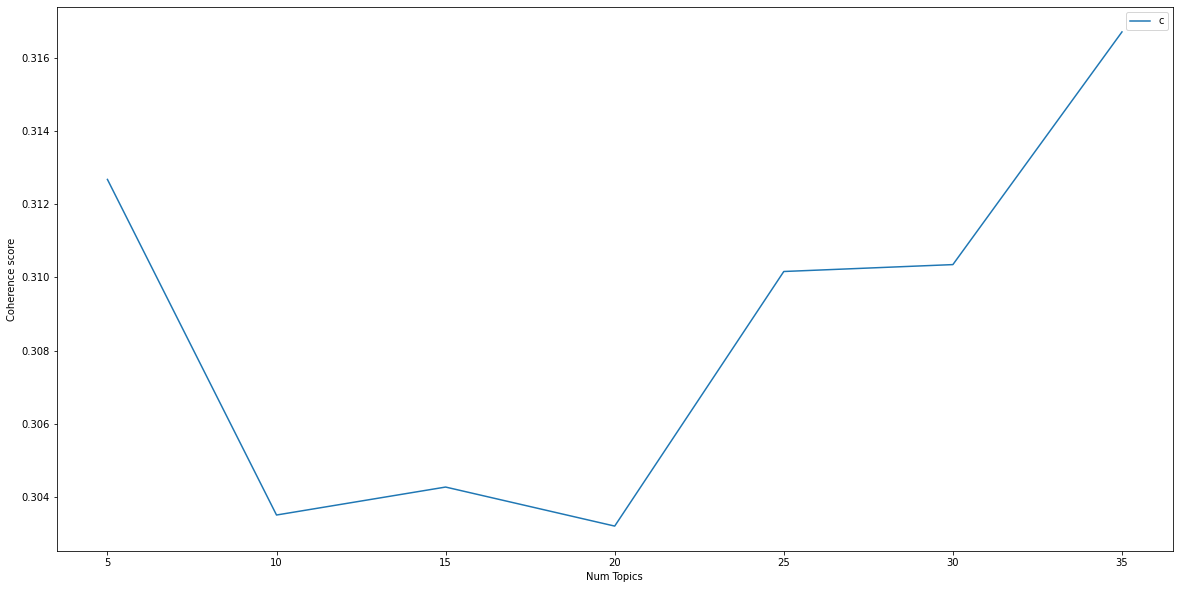

Num Topics = 5  has Coherence Value of 0.3127
Num Topics = 10  has Coherence Value of 0.3035
Num Topics = 15  has Coherence Value of 0.3043
Num Topics = 20  has Coherence Value of 0.3032
Num Topics = 25  has Coherence Value of 0.3102
Num Topics = 30  has Coherence Value of 0.3104
Num Topics = 35  has Coherence Value of 0.3167


In [16]:
model_list, coherence_values = lda_utils.compute_coherence_values(texts=data_processed,
                                                                  corpus=corpus, 
                                                                  dictionary=id2word,  
                                                                  start=5, 
                                                                  limit=40,  
                                                                  step=5)

__Most dominant topic per chunk__

In [17]:
df_topic_keywords = lda_utils.format_topics_sentences(ldamodel=lda_model, 
                                                      corpus=corpus, 
                                                      texts=data_processed)

# Format
df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns = ['Chunk_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Chunk_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.5022,"com, www, http, trump, schedule, video, hater,...","[night, list, tonight, morning, book, tip, com..."
1,1,9.0,0.5943,"com, www, http, trump, schedule, video, hater,...","[self, com, pqpfvm, win, champion, tinyurl, co..."
2,2,2.0,0.4852,"people, country, job, border, time, year, vote...","[call, quit, www, com, check, showcase, page, ..."
3,3,2.0,0.5831,"people, country, job, border, time, year, vote...","[friend, entertainer, loss, tinyurl, com, inde..."
4,4,9.0,0.7098,"com, www, http, trump, schedule, video, hater,...","[appearance, com, bahama, tonight, bid, oreo, ..."
5,5,9.0,0.5383,"com, www, http, trump, schedule, video, hater,...","[wedding, spectacular, couple, father, work, s..."
6,6,3.0,0.5360,"thank, realdonaldtrump, bit, love, http, cours...","[tradition, colt, saint, champion, team, today..."
7,7,9.0,0.5199,"com, www, http, trump, schedule, video, hater,...","[collection, traveler, reader, choice, award, ..."
8,8,3.0,0.6021,"thank, realdonaldtrump, bit, love, http, cours...","[tomorrow, night, adventure, world, champion, ..."
9,9,3.0,0.9699,"thank, realdonaldtrump, bit, love, http, cours...","[tomorrow, night, melania, fashion, jewelry, c..."


In [18]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                      grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                      axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8463,"com, status, twitter, https, pic, scam, tonight, crime, seanhannity, realdonaldtrump","[week, com, trump, status, https, twitter, com, realdonaldtrump, status, congratulation, job, ht..."
1,1.0,0.7254,"source, email, agent, charge, police, crime, doubt, information, paper, vision","[head, lesson, negotiation, sweepstweet, model, type, sweepstweet, move, model, project, manager..."
2,2.0,0.9719,"people, country, job, border, time, year, vote, news, deal, today","[solution, job, bill, tax, increase, program, sanction, deck, dollar, bonus, tax, dollar, money,..."
3,3.0,0.9742,"thank, realdonaldtrump, bit, love, http, course, show, time, trump, work","[touch, nvmusic, situation, people, instinct, tl, advice, insight, sweepstweet, firing, player, ..."
4,4.0,0.4433,"vet, decade, voting, representative, luck, stop, pol, inspiration, let, duty","[access, person, talent, drawing, board, nation, let, injustice, world, election, total, democra..."
5,5.0,0.7281,"crowd, celebapprentice, intelligence, charity, gang, witness, side, storm, legislation, loophole","[michellemalkin, davidshuster, jbail, amount, thing, sharleneh]"
6,6.0,0.4598,"dem, crime, post, impeachment, member, phone, conversation, officer, voter, amendment","[view, time, today, solution, cliff, republican, debt, ceiling, debt, ceiling, debt, ceiling, wi..."
7,7.0,0.9816,"medium, year, people, today, immigration, time, http, bit, news, job","[oil, record, need, use, resource, ally, outnegotiate, spending, ally, http, way, security, work..."
8,8.0,0.4652,"witch, hunt, reform, court, mind, obstruction, mueller, view, side, healthcare","[debate, tonight, assessment, fun, vpdebate, candidate, mouth, mind, vpdebate, mess, smiling, vp..."
9,9.0,0.9018,"com, www, http, trump, schedule, video, hater, article, room, matter","[root, calender, missuniverse, event, westchester, www, trump, com, westchester, westchester, ww..."


__Visualizations with pyLDAvis__

In [19]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.312498  0.083912       1        1  38.500209
3      0.222678  0.047526       2        1  19.721340
7      0.254968  0.127320       3        1  18.697922
0      0.073659 -0.292246       4        1   6.929088
9     -0.001296 -0.246740       5        1   5.098428
6     -0.155271  0.062152       6        1   2.843461
1     -0.158079  0.059311       7        1   2.403554
8     -0.182139  0.084422       8        1   2.120199
4     -0.178644  0.035549       9        1   1.878657
5     -0.188374  0.038794      10        1   1.807142, topic_info=            Term         Freq        Total Category  logprob  loglift
4            com  3224.000000  3224.000000  Default  30.0000  30.0000
3897      status  1144.000000  1144.000000  Default  29.0000  29.0000
53         thank  1772.000000  1772.000000  Default  28.0000  28.0000
75       twitter   889.000000   889.000000  Default  27.0000  27.0000
25           www   667.000000   667.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1450        side    60.715257   108.271306  Topic10  -3.7626   3.4350
84          bank    29.714015    49.160848  Topic10  -4.4772   3.5099
800     standard    15.614139    22.362746  Topic10  -5.1207   3.6542
657   investment    16.334162    45.198758  Topic10  -5.0756   2.9956
776       amount    16.264484   100.832190  Topic10  -5.0799   2.1890

[524 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1982      6  0.980976          access
1421      8  0.964189        activity
734       3  0.886573  administration
734       4  0.108877  administration
3584      9  0.931334          admire
...     ...       ...             ...
119       4  0.009819            year
235       1  0.386197       yesterday
235       2  0.099664       yesterday
235       3  0.510777       yesterday
235       4  0.003114       yesterday

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 8, 1, 10, 7, 2, 9, 5, 6])

__Visualizations with seaborn__

In [20]:
# Preprocessing
values = list(lda_model.get_document_topics(corpus))

split = []
for entry in values:
    topic_prevelance = []
    for topic in entry:
        topic_prevelance.append(topic[1])
    split.append(topic_prevelance)

df = pd.DataFrame(map(list,zip(*split)))

<AxesSubplot:>

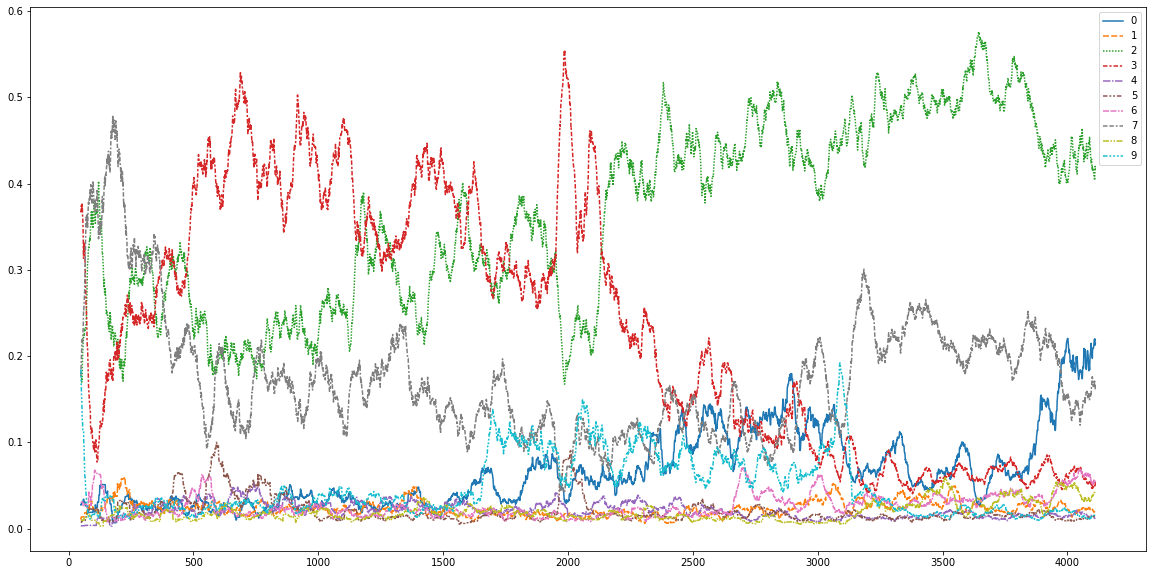

In [21]:
sns.lineplot(data=df.T.rolling(50).mean())